In [38]:
from glob import glob
import seaborn as sns
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [39]:
kws_globstr = r"C:\projects\malachor5\data\keyword_search\tira_eval_kws\*-window.json"
kws_files = glob(kws_globstr)
kws_files

['C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_5sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-2sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210913-0_5sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210913-2sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20220327_2-2sec-window.json']

In [35]:
rows = []
for kws_path in kws_files:
    kws_basename = os.path.basename(kws_path)
    kws_stem, window_len = kws_basename.split('-')[:2]
    with open(kws_path, encoding='utf8') as f:
        kws_obj=json.load(f)
    metrics = kws_obj['metrics']
    for metric in metrics:
        rows.append({
            "source": kws_stem,
            "window_len": window_len,
            "eer": metric['eer'],
            "eer_threshold": metric['eer_threshold'],
            "lr_eer": metric['lr_eer'],
            "lr_eer_threshold": metric['lr_eer_threshold'],
            "lr_beta1": metric["lr_params"]["lr_coefficients"][0][0],
            "lr_beta2": metric["lr_params"]["lr_coefficients"][0][1],
            "lr_intercept": metric["lr_params"]["lr_intercept"],
            "keyword": metric["keyword"]
        })
df = pd.DataFrame(rows)
df['keyword_len']=df['keyword'].str.len()
df.head()

,source,window_len,eer,eer_threshold,lr_eer,lr_eer_threshold,lr_beta1,lr_beta2,lr_intercept,keyword,keyword_len
0,HH20210312,0_5sec,0.000750,0.628879,0.000844,0.000267,0.817256,-0.643451,-8.503661,jə,2
1,HH20210312,0_5sec,0.103930,0.260039,0.152050,0.000167,0.418592,-0.059985,-8.761223,jɛ,2
2,HH20210312,0_5sec,0.174955,0.215436,0.184932,0.014865,10.633128,-1.466885,-5.579994,làŋə̄l,7
3,HH20210312,0_5sec,0.258824,0.259895,0.258824,0.009427,7.792726,-2.558277,-5.116312,və́lɛ̂ðà,9
4,HH20210312,0_5sec,0.124376,0.246458,0.122117,0.005334,5.080851,-3.197172,-4.604695,və́lɛ̀ðǎló,12


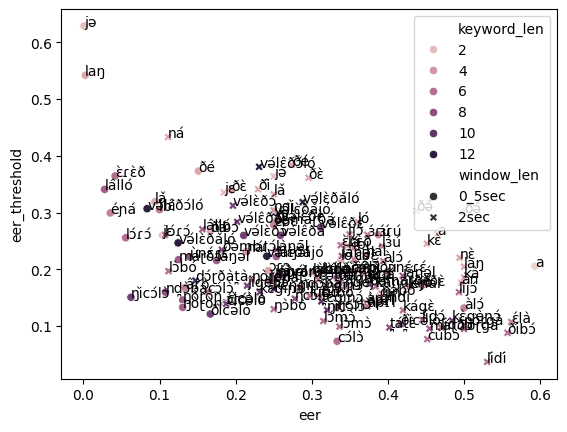

In [44]:
fig=sns.scatterplot(df, x='eer', y='eer_threshold', hue='keyword_len', style="window_len")
# fig.set(ylim=(0,1), xlim=(0,1))
for _, row in df.iterrows():
    plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

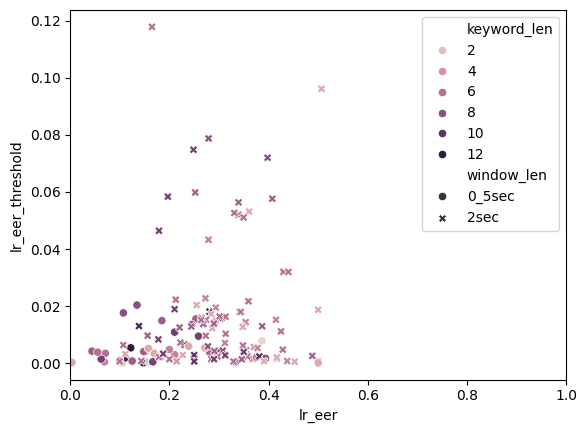

In [41]:
fig=sns.scatterplot(df, x='lr_eer', y='lr_eer_threshold', hue='keyword_len', style="window_len")
fig.set(xlim=(0,1))
plt.show()